# Sterlite EdIndia
### Candidate Name: Mayur Kumar Sharma
### Mail ID: mayur4everyone@gmail.com
### Mob: 9649552001

## Assignment: 2
### Exploratory data analysis of the dataset, finding insights, relationships between variables and their dependencies over each others, in order to improve the target variable "IQ".

In [11]:
# Importing libraries

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Connect to the database
conn = sqlite3.connect('D:/DS/EdIndia/IQDataset.db')

In [50]:
# Execute a query and fetch the results
query = "SELECT * FROM IQDataset"
results = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Convert the results to a DataFrame
df = pd.DataFrame(results)

In [89]:
df.shape

(2000000, 35)

In [87]:
student_count = len(df)
average_present_days = df['present_days_out_off_100_instruction_days'].mean()
print(f"Total number of students in Train-Dataset: {student_count}")
print(f"Average number of present days: {average_present_days}")

Total number of students in Train-Dataset: 2000000
Average number of present days: 91.3035515


In [51]:
# 1. Mapping of categories of "Study_Time_per_day" to numeric values
mapping1 = {
    '1-<2hours': 0,
    '2to<4hours': 1,
    '4to<6hours': 2,
    '6+hours': 3
}
# Apply the mapping to the column
df['Study_Time_per_day'] = df['Study_Time_per_day'].map(mapping1)

# 2. Mapping of categories of "Mother_Education" to numeric values
mapping2 = {
    'None': 0,
    'Upper_Primary': 1,
    'Higher_Secondary': 2,
    'Graduation': 3
}
# Apply the mapping to the column
df['Mother_Education'] = df['Mother_Education'].map(mapping2)

# 3. Mapping of categories of "IQ" to numeric values
mapping3 = {
    'Ordinary': 0,
    'Extraordinary': 1
}
# Apply the mapping to the column
df['IQ'] = df['IQ'].map(mapping3)

array([[<AxesSubplot: title={'center': 'ID'}>,
        <AxesSubplot: title={'center': 'present_days_out_off_100_instruction_days'}>,
        <AxesSubplot: title={'center': 'Number_Counting'}>,
        <AxesSubplot: title={'center': 'Addition'}>,
        <AxesSubplot: title={'center': 'Subtraction'}>,
        <AxesSubplot: title={'center': 'Multiplication'}>],
       [<AxesSubplot: title={'center': 'Division'}>,
        <AxesSubplot: title={'center': 'Word_Problem'}>,
        <AxesSubplot: title={'center': 'Sentence_Reading'}>,
        <AxesSubplot: title={'center': 'Listen_and_Writing'}>,
        <AxesSubplot: title={'center': 'Question_and_Answer'}>,
        <AxesSubplot: title={'center': 'Word_Formation'}>],
       [<AxesSubplot: title={'center': 'Enacting_Poem'}>,
        <AxesSubplot: title={'center': 'Picture_Reading'}>,
        <AxesSubplot: title={'center': 'Sentence_Formation'}>,
        <AxesSubplot: title={'center': 'Story_Formation'}>,
        <AxesSubplot: title={'center': 

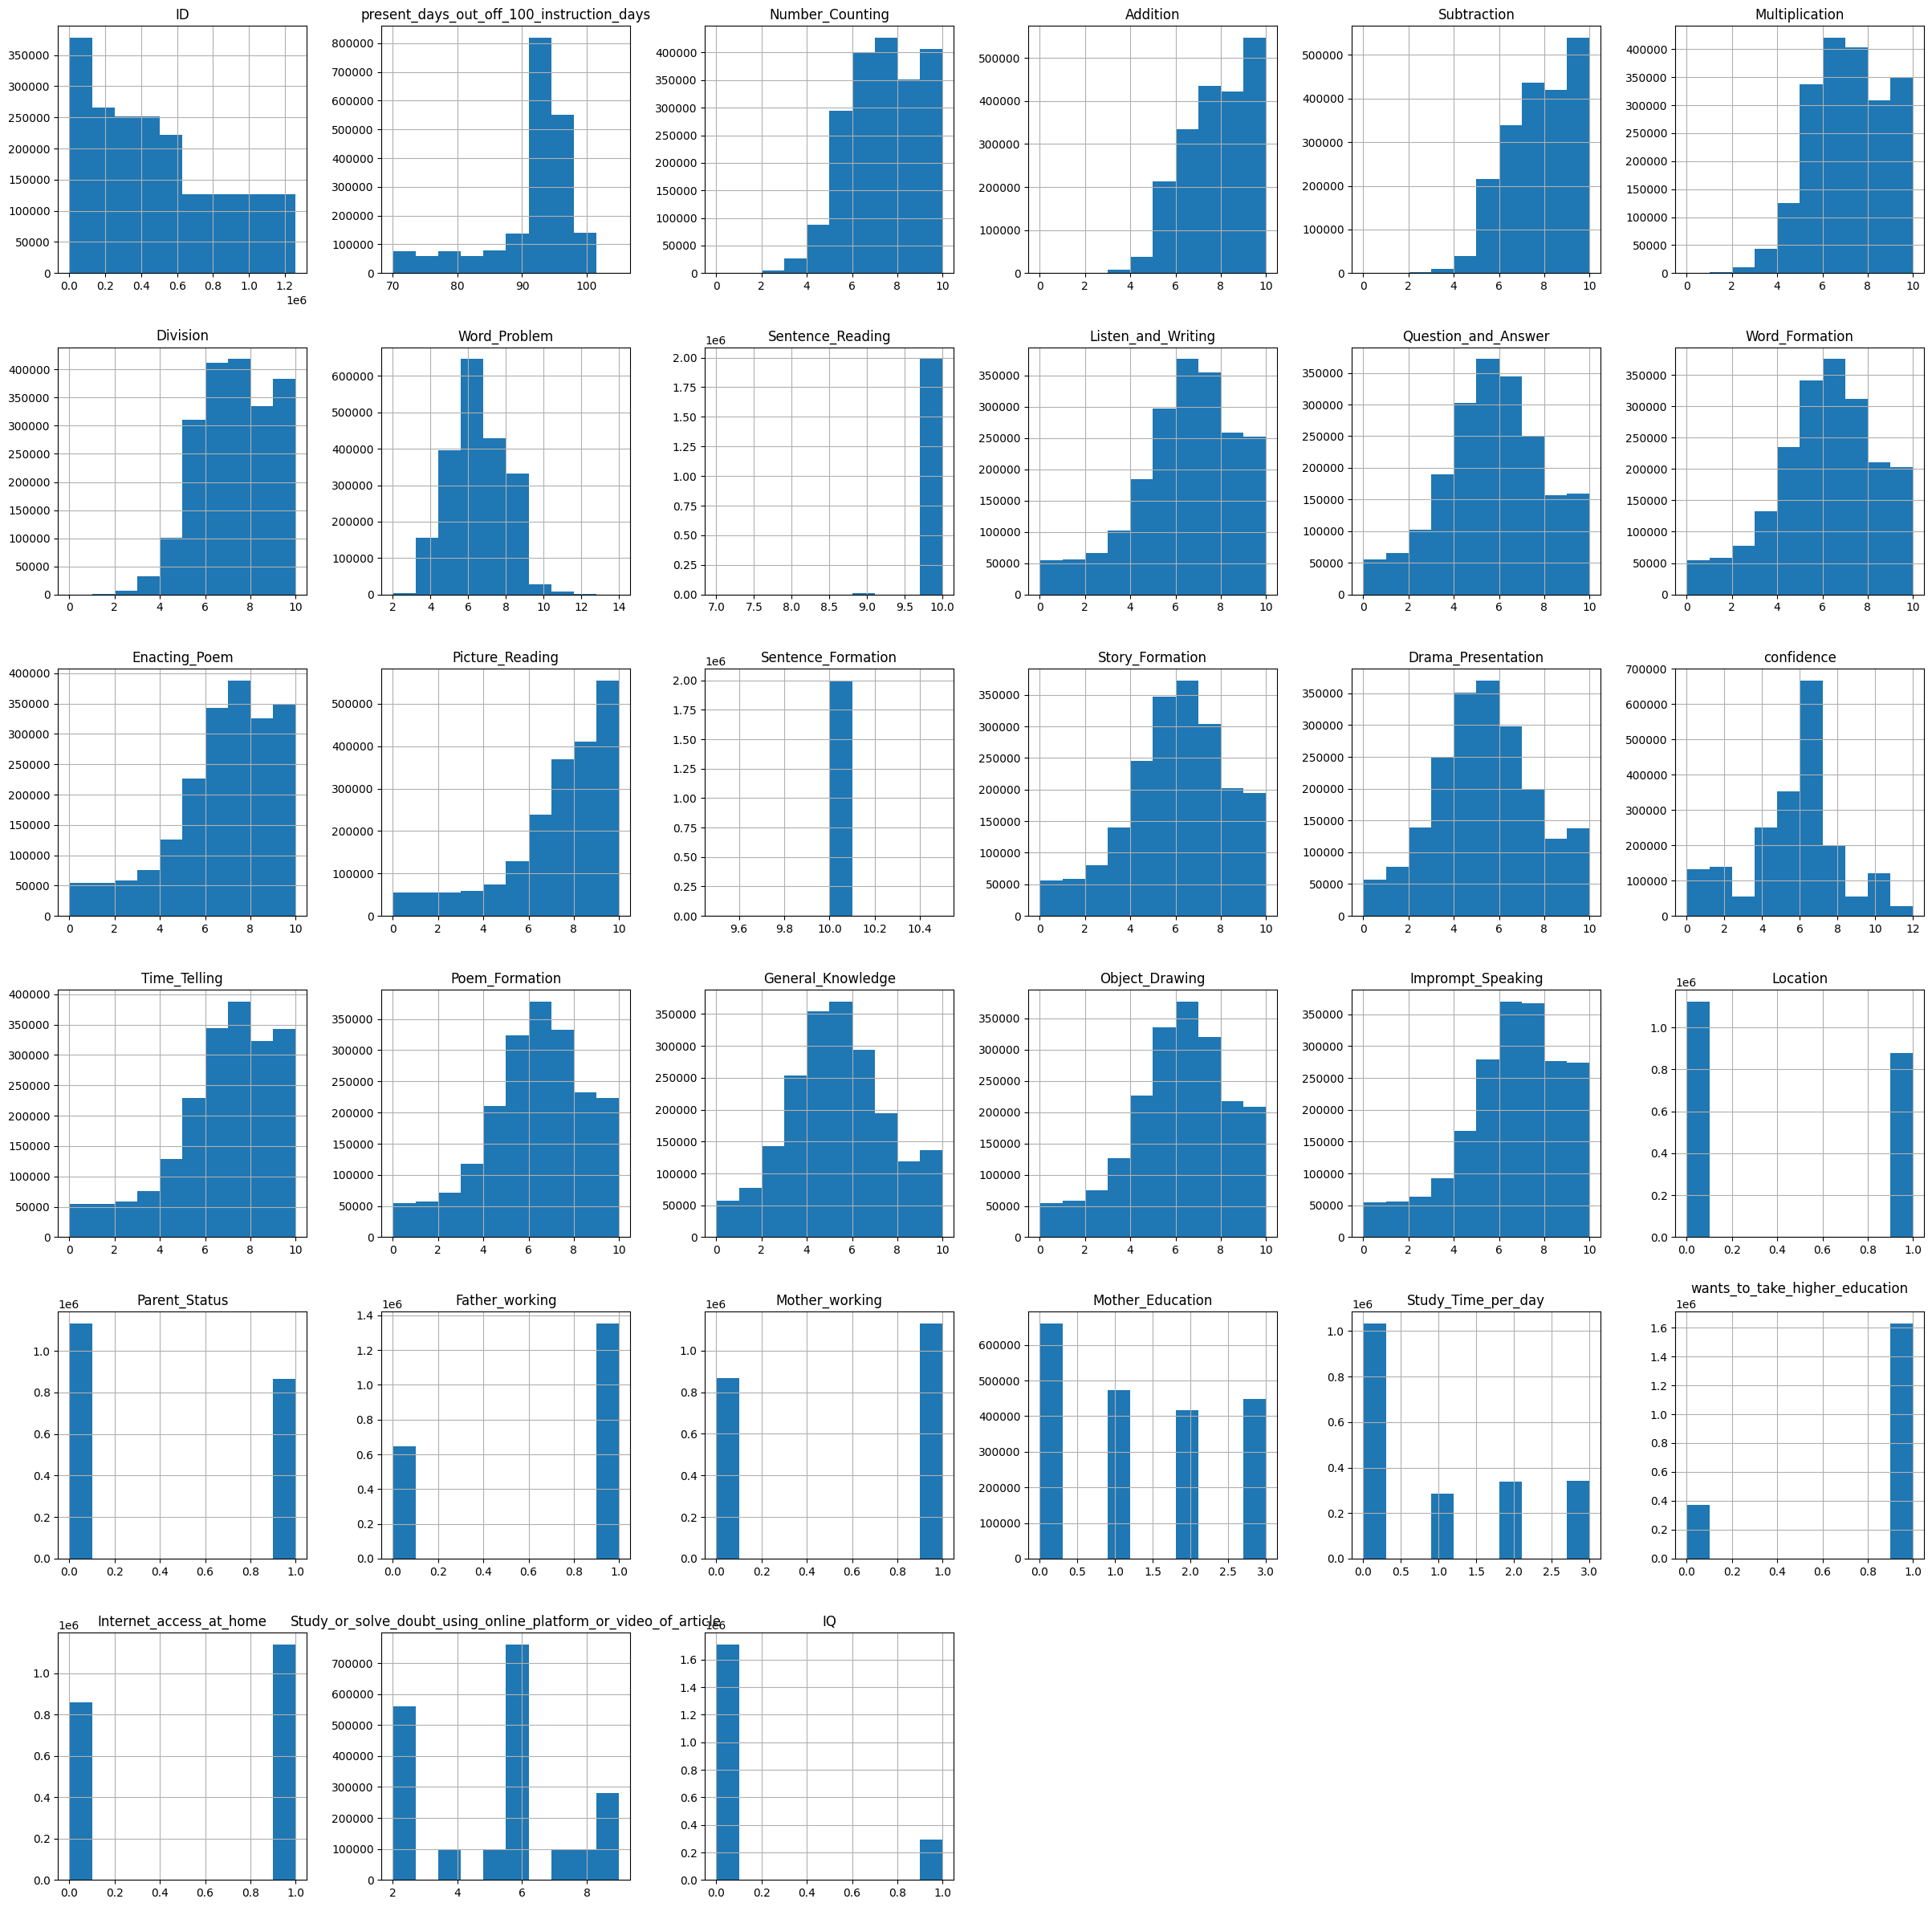

In [57]:
df.hist(figsize = (30, 30))

# Insight:1

### We can clearly see that many of the given columns are distributed Normally. 
### Some of those normally distributed variables, are strongly related to the target variable "IQ" (as shown in the Assignment1 file), so we can use them for further analysis.

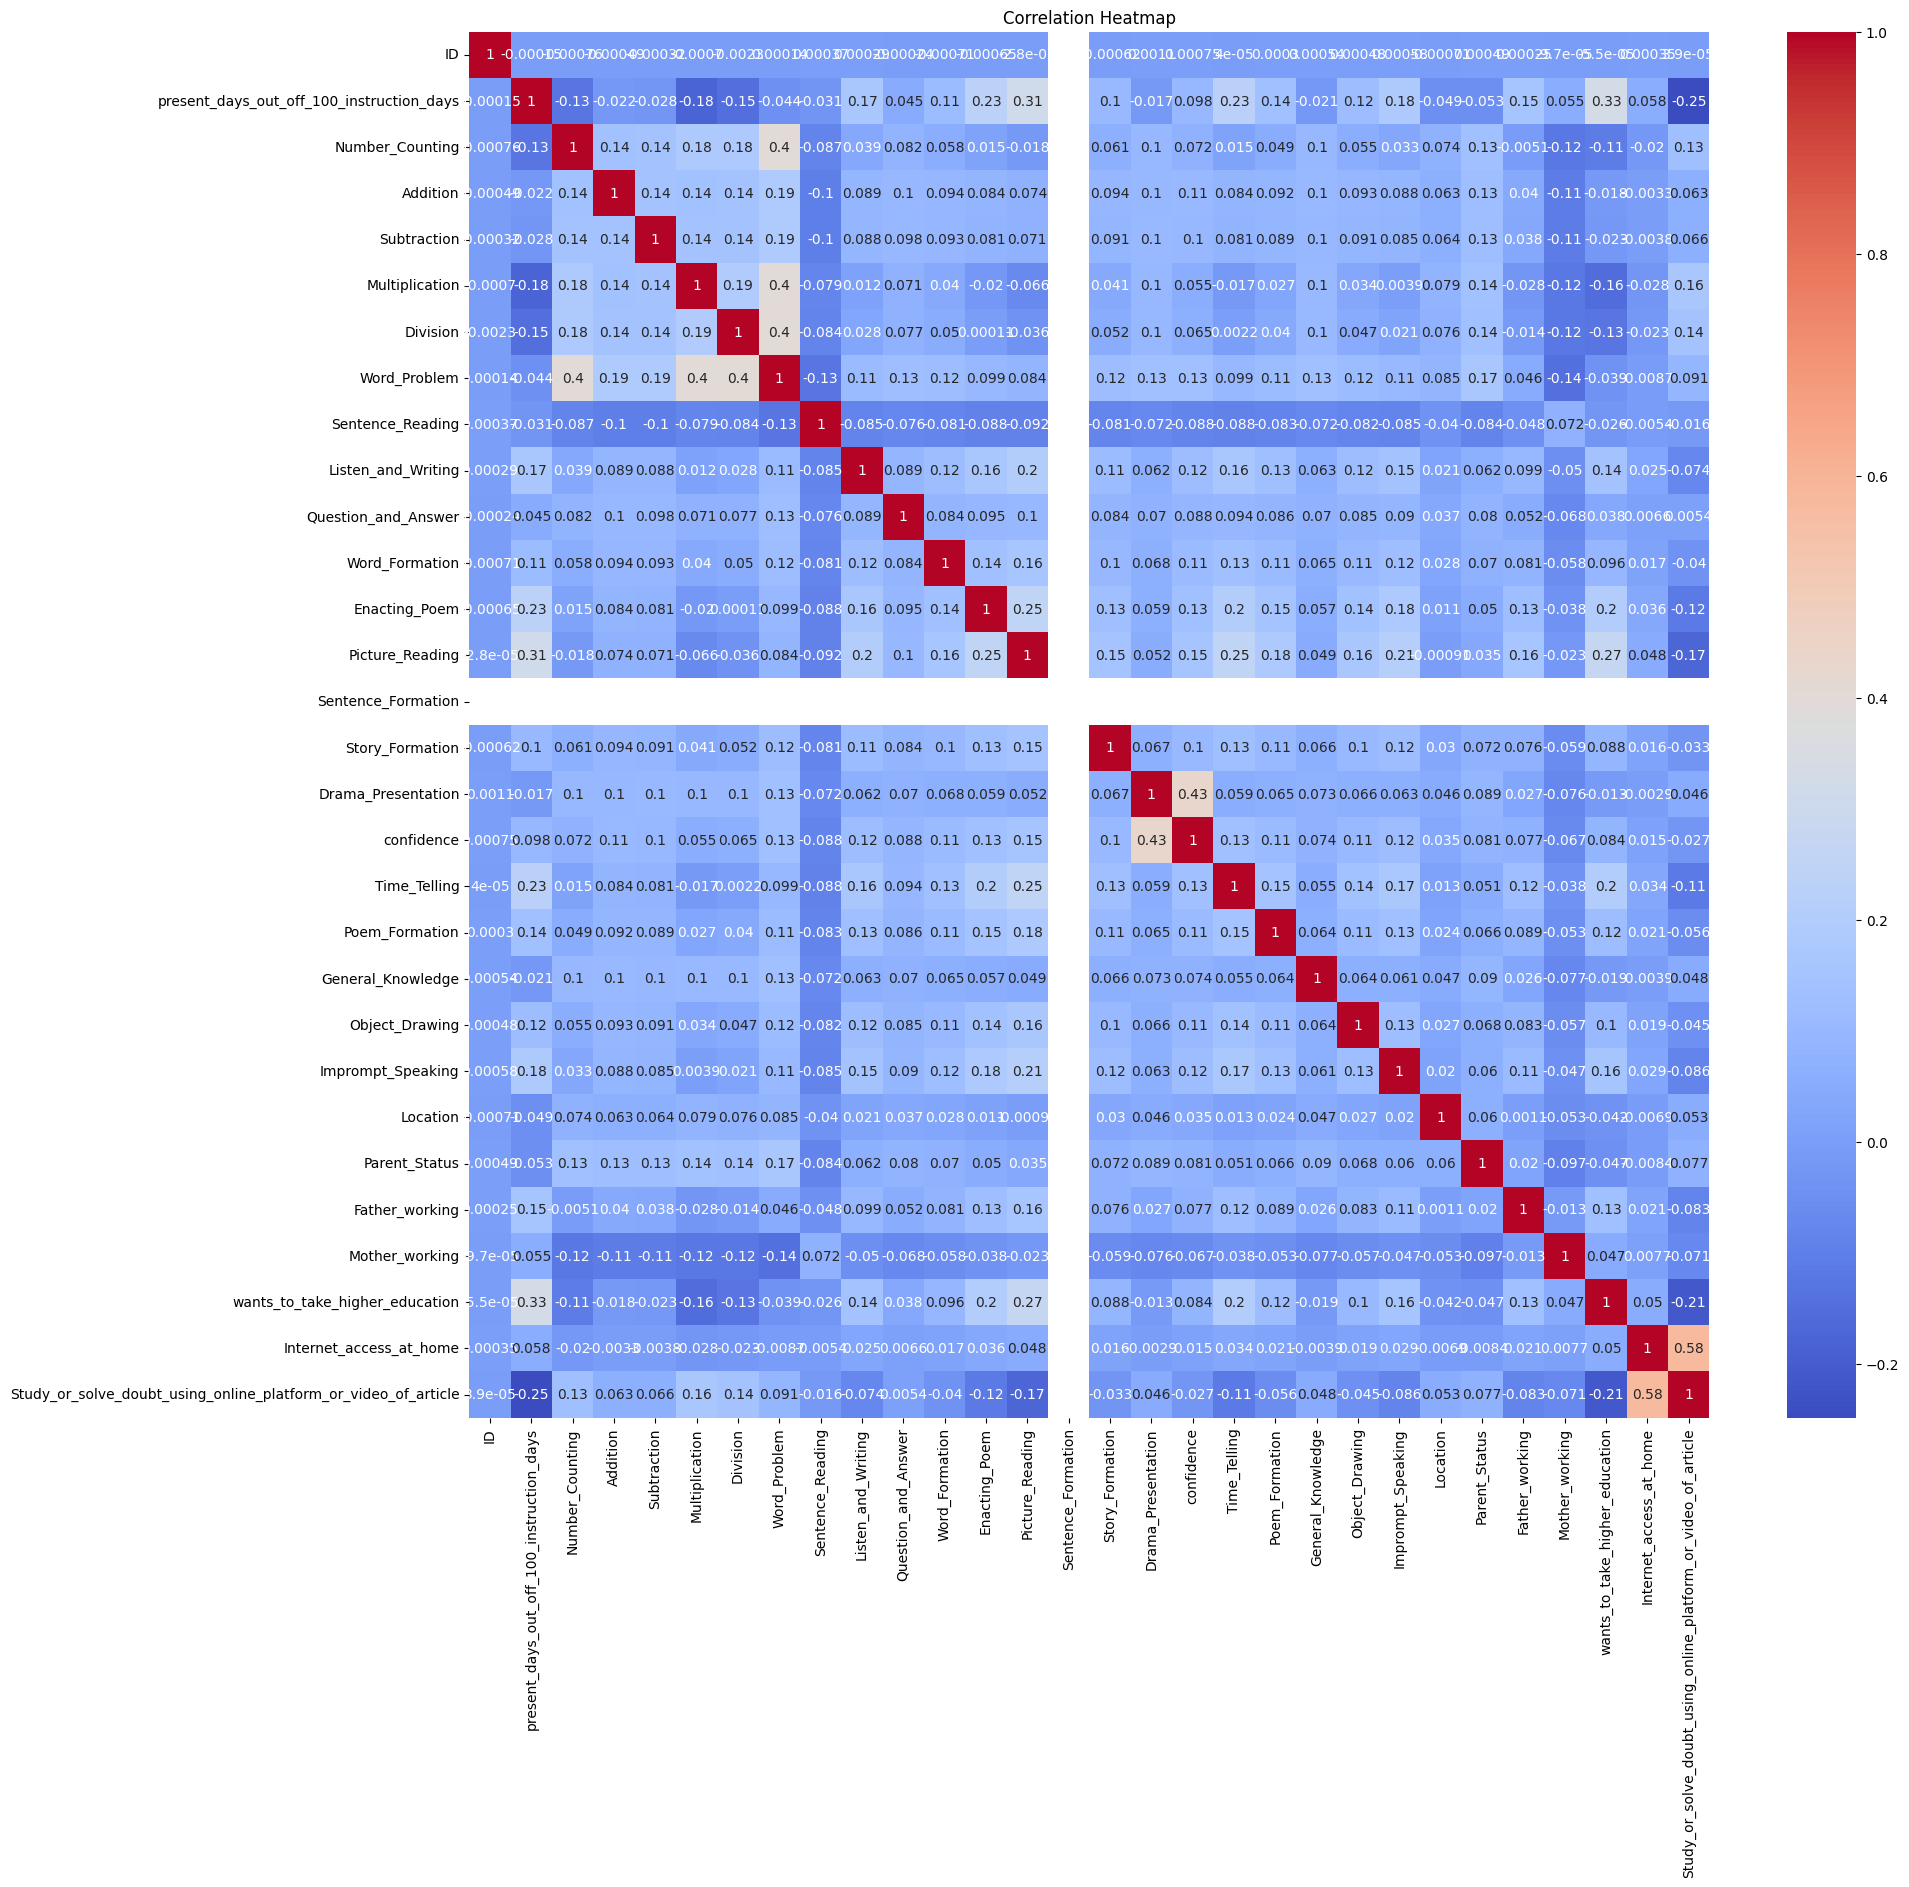

In [39]:
# Correlation heatmap
corr_matrix = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Insight: 2
### 1. "Word_Problem" variable is highly correlated with "Number_Counting", "Multiplication" and "Division" variables.
### 2. "confidence" variable is highly correlated with "Drama_Presentation".
### 3. "Study_or_solve_doubt_using_online_platform_or_video_of_article", this is highly correalted with "Internet_access_at_home".

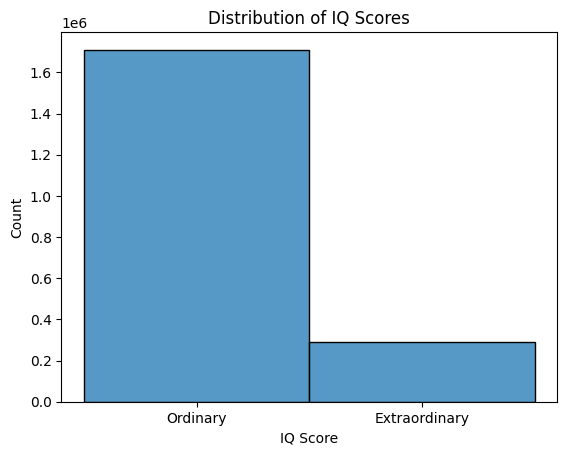

In [16]:
# Distribution of IQ scores
sns.histplot(data=df, x='IQ', bins=5)
plt.title('Distribution of IQ Scores')
plt.xlabel('IQ Score')
plt.ylabel('Count')
plt.show()

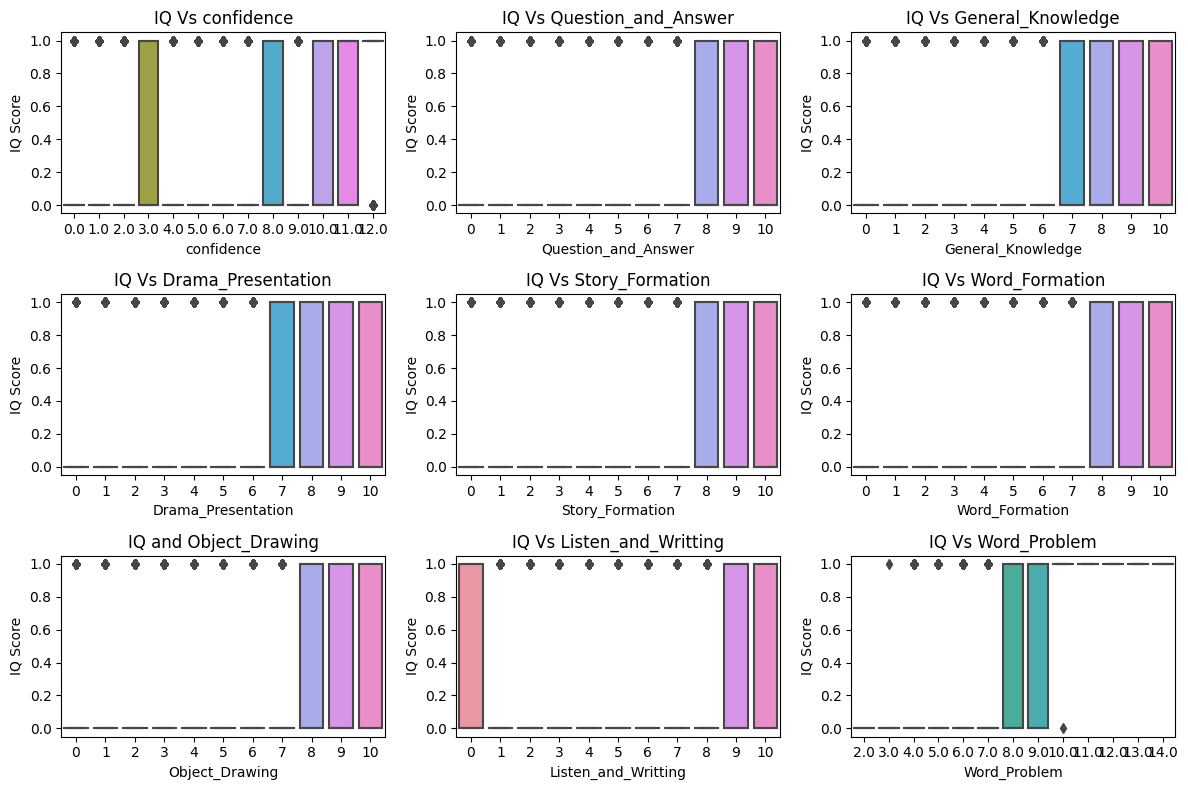

In [79]:
# Plotting the variables which are more related to "IQ", compared to others.

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the first bar plot
plt.subplot(3, 3, 1)  # 3 rows, 3 columns plot-1
sns.boxplot(data=df, x='confidence', y='IQ')
plt.title('IQ Vs confidence')
plt.xlabel('confidence')
plt.ylabel('IQ Score')

# Plot-2
plt.subplot(3, 3, 2)
sns.boxplot(data=df, x='Question_and_Answer', y='IQ')
plt.title('IQ Vs Question_and_Answer')
plt.xlabel('Question_and_Answer')
plt.ylabel('IQ Score')

# Plot-3
plt.subplot(3, 3, 3)
sns.boxplot(data=df, x='General_Knowledge', y='IQ')
plt.title('IQ Vs General_Knowledge')
plt.xlabel('General_Knowledge')
plt.ylabel('IQ Score')

# Plot-4
plt.subplot(3, 3, 4)
sns.boxplot(data=df, x='Drama_Presentation', y='IQ')
plt.title('IQ Vs Drama_Presentation')
plt.xlabel('Drama_Presentation')
plt.ylabel('IQ Score')

# Plot-5
plt.subplot(3, 3, 5)
sns.boxplot(data=df, x='Story_Formation', y='IQ')
plt.title('IQ Vs Story_Formation')
plt.xlabel('Story_Formation')
plt.ylabel('IQ Score')

# Plot-6
plt.subplot(3, 3, 6)
sns.boxplot(data=df, x='Word_Formation', y='IQ')
plt.title('IQ Vs Word_Formation')
plt.xlabel('Word_Formation')
plt.ylabel('IQ Score')

# Plot-7
plt.subplot(3, 3, 7)
sns.boxplot(data=df, x='Object_Drawing', y='IQ')
plt.title('IQ and Object_Drawing')
plt.xlabel('Object_Drawing')
plt.ylabel('IQ Score')

# Plot-8
plt.subplot(3, 3, 8)
sns.boxplot(data=df, x='Listen_and_Writing', y='IQ')
plt.title('IQ Vs Listen_and_Writting')
plt.xlabel('Listen_and_Writting')
plt.ylabel('IQ Score')

# Plot-9
plt.subplot(3, 3, 9)
sns.boxplot(data=df, x='Word_Problem', y='IQ')
plt.title('IQ Vs Word_Problem')
plt.xlabel('Word_Problem')
plt.ylabel('IQ Score')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Insight: 3

### By seeing the above relations with respect to the target variable "IQ", we suggest to improve the below variables in order to increase the IQ level of students:
### 1. confidence
### 2. Question_and_Answer
### 3. General_Knowledge
### 4. Drama_Presentation
### 5. Story_Formation
### 6. Word_Formation
### 7. Object_Drawing
### 8. Word_Problem

Text(0, 0.5, 'IQ Score')

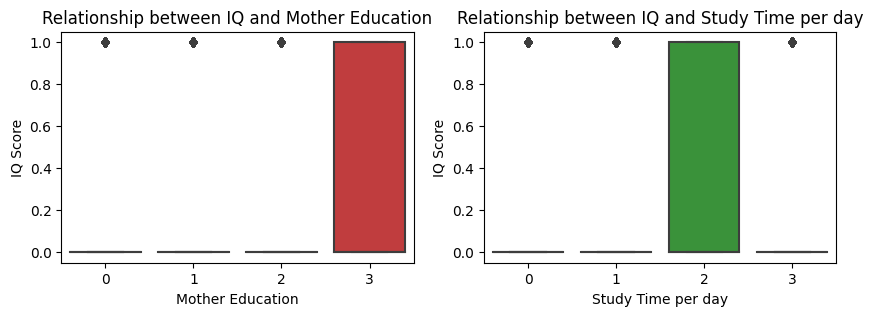

In [77]:
# Other relative variables analysis

# Set the figure size
plt.figure(figsize=(10, 3))

# Plot the first bar plot
plt.subplot(1, 2, 1)  # 1 rows, 2 columns plot-1
sns.boxplot(data=df, x='Mother_Education', y='IQ')
plt.title('Relationship between IQ and Mother Education')
plt.xlabel('Mother Education')
plt.ylabel('IQ Score')

# Plot-2
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Study_Time_per_day', y='IQ')
plt.title('Relationship between IQ and Study Time per day')
plt.xlabel('Study Time per day')
plt.ylabel('IQ Score')

# Insight: 4
### Based on the analysis, it is recommended to focus on improving "Study_Time_per_day", as it has a positive impact on IQ scores.
### There is positive relationship between them.
### Encouraging mothers to pursue higher education can also contribute to improved educational outcomes.

# Insight: 5
### Additionally, efforts should be made to strengthen math skills, i.e. Addition, Subtraction, Multiplication and Division as they have a high correlation with IQ.

# Thank-You....!